# Predicting Life Expectancy using Machine Learning

Predicting life expectancy is a measure of a average time a human being is expected to live. Life expectancy is depends on various factors such as Regional variations, Economic Circumstances, Sex Differences, Mental Illnesses, Physical Illnesses, Education, Year of their birth and other demographic factors. This problem statement provides a way to predict average life expectancy of people living in a country when various factors such as year, GDP, education, alcohol intake of people in the country, expenditure on healthcare system and some specific disease related deaths that happened in the country are given.

In [15]:
# Importing Libraries 
import numpy as np                  # Library to handle data in vectorized manner.
import pandas as pd                 # Library for data analysis.
import matplotlib.pyplot as plt     # Plotting libray matplotlib and associated ploting modules.
import seaborn as sns               # Data visualization library. 
import matplotlib.cm as cm          
from scipy.stats.mstats import winsorize  # Handle outlier
import scipy.stats as stats               
import warnings                           # To ignore deprecation warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Data Gathering

Reading the data from CSV file. Reading dataset The data used for predicting the life expectancy is stored in CSV file i.e. Life_Expectancy_Data.csv. we read the data stored in csv file and store in variable named Life_data.

In [93]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_c43b3b86e40e434b99744e4914b3dd9b = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='QG0N4zVbforaMn1Uj3DXEUCaWMqQoVnBX-nuELNhpHWk',
    ibm_auth_endpoint="https://iam.cloud.ibm.com/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3.eu-geo.objectstorage.service.networklayer.com')

body = client_c43b3b86e40e434b99744e4914b3dd9b.get_object(Bucket='new-donotdelete-pr-nb4o7x18sa4riw',Key='Life_Expectancy_Data.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

Life_data = pd.read_csv(body)
Life_data.head()


,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [94]:
#Represent number of elements in object.
Life_data.size 

64636

In [95]:
Life_data.shape

(2938, 22)

In [96]:
Life_data.columns

Index(['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling'],
      dtype='object')

In [98]:
Life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


In [100]:
Life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
Country                            2938 non-null object
Year                               2938 non-null int64
Status                             2938 non-null object
Life expectancy                    2928 non-null float64
Adult Mortality                    2928 non-null float64
infant deaths                      2938 non-null int64
Alcohol                            2744 non-null float64
percentage expenditure             2938 non-null float64
Hepatitis B                        2385 non-null float64
Measles                            2938 non-null int64
 BMI                               2904 non-null float64
under-five deaths                  2938 non-null int64
Polio                              2919 non-null float64
Total expenditure                  2712 non-null float64
Diphtheria                         2919 non-null float64
 HIV/AIDS                          2938 non-null

In [102]:
Life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [103]:
country_list = Life_data.Country.unique()
fill_list = ['Country', 'Year', 'Status', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling']

In [106]:
for country in country_list:Life_data.loc[Life_data['Country'] == country,fill_list] = Life_data.loc[Life_data['Country'] == country,fill_list].interpolate()
Life_data.dropna(inplace=True)

In [108]:
Life_data.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [109]:
col_dict = {'Life expectancy ':1 , 'Adult Mortality':2 ,
        'Alcohol':3 , 'percentage expenditure': 4, 'Hepatitis B': 5,
       'Measles ' : 6, ' BMI ': 7, 'under-five deaths ' : 8, 'Polio' : 9, 'Total expenditure' :10,
       'Diphtheria ':11, ' HIV/AIDS':12, 'GDP':13, 'Population' :14,
       ' thinness  1-19 years' :15, ' thinness 5-9 years' :16,
       'Income composition of resources' : 17, 'Schooling' :18, 'infant deaths':19}

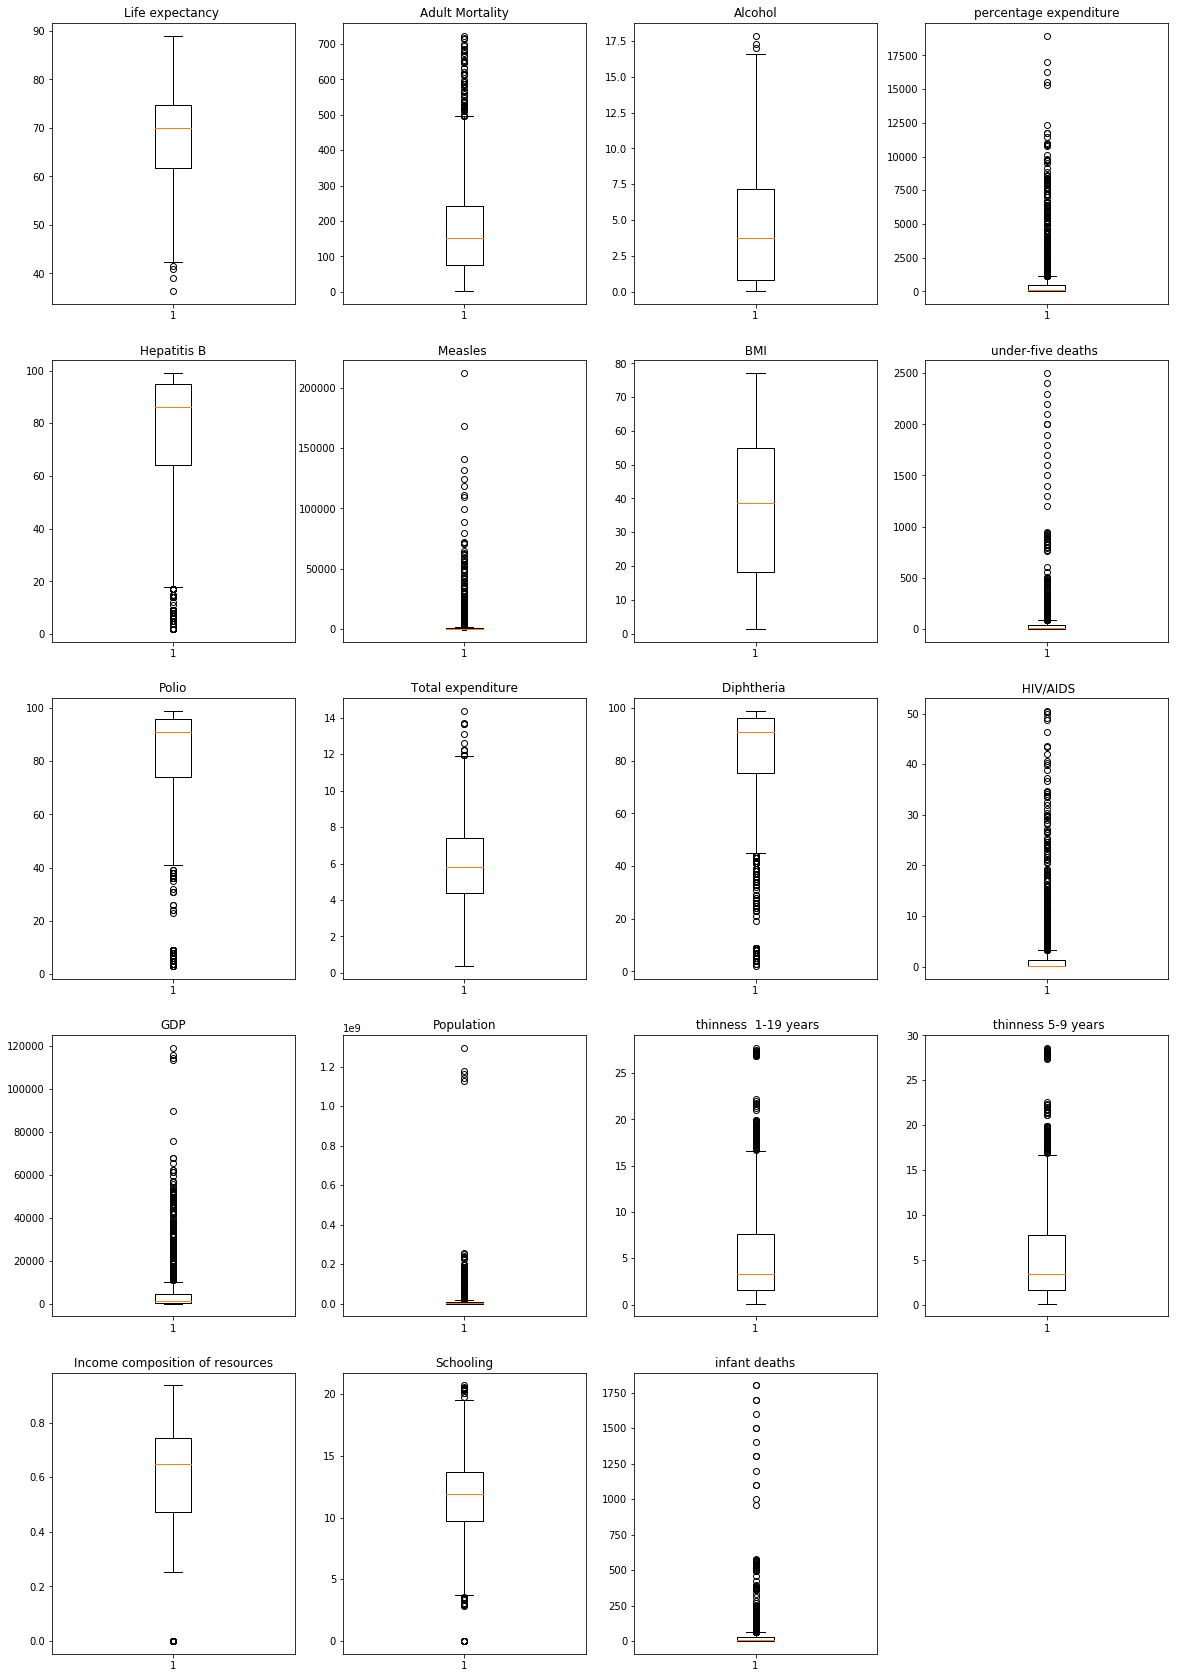

In [111]:
plt.figure(figsize=(20,30))

for variable,i in col_dict.items():
                     plt.subplot(5,4,i)
                     plt.boxplot(Life_data[variable],whis=1.5)
                     plt.title(variable)

plt.show()

In [112]:
for variable in col_dict.keys():
    q75, q25 = np.percentile(Life_data[variable], [75 ,25])
    iqr = q75 - q25
    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable, len((np.where((Life_data[variable] > max_val) | (Life_data[variable] < min_val))[0])), len((np.where((Life_data[variable] > max_val) | (Life_data[variable] < min_val))[0]))*100/1987))

Number of outliers and percentage of it in Life expectancy  : 4 and 0.20130850528434827
Number of outliers and percentage of it in Adult Mortality : 58 and 2.9189733266230498
Number of outliers and percentage of it in Alcohol : 3 and 0.1509813789632612
Number of outliers and percentage of it in percentage expenditure : 232 and 11.675893306492199
Number of outliers and percentage of it in Hepatitis B : 216 and 10.870659285354806
Number of outliers and percentage of it in Measles  : 361 and 18.16809260191243
Number of outliers and percentage of it in  BMI  : 0 and 0.0
Number of outliers and percentage of it in under-five deaths  : 227 and 11.424257674886764
Number of outliers and percentage of it in Polio : 159 and 8.002013085052843
Number of outliers and percentage of it in Total expenditure : 13 and 0.6542526421741318
Number of outliers and percentage of it in Diphtheria  : 195 and 9.813789632611979
Number of outliers and percentage of it in  HIV/AIDS : 309 and 15.551082033215904
Numbe

# Removing the outliers using winsorization

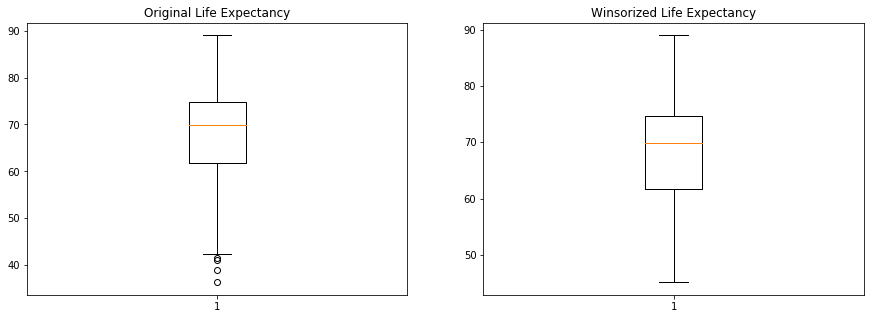

In [113]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Life_Expectancy = Life_data['Life expectancy ']
plt.boxplot(original_Life_Expectancy)
plt.title("Original Life Expectancy")

plt.subplot(1,2,2)
winsorized_Life_Expectancy = winsorize(Life_data['Life expectancy '],(0.01,0))
plt.boxplot(winsorized_Life_Expectancy)
plt.title("Winsorized Life Expectancy")

plt.show()

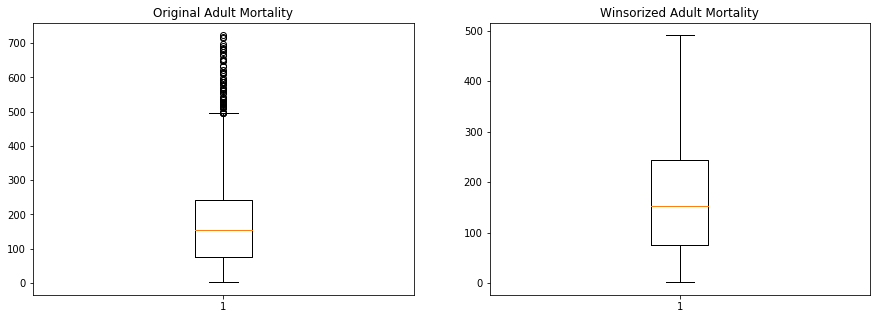

In [114]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Adult_Mortality = Life_data['Adult Mortality']
plt.boxplot(original_Adult_Mortality)
plt.title("Original Adult Mortality")

plt.subplot(1,2,2)
winsorized_Adult_Mortality = winsorize(Life_data['Adult Mortality'],(0,0.03))
plt.boxplot(winsorized_Adult_Mortality)
plt.title("Winsorized Adult Mortality")

plt.show()

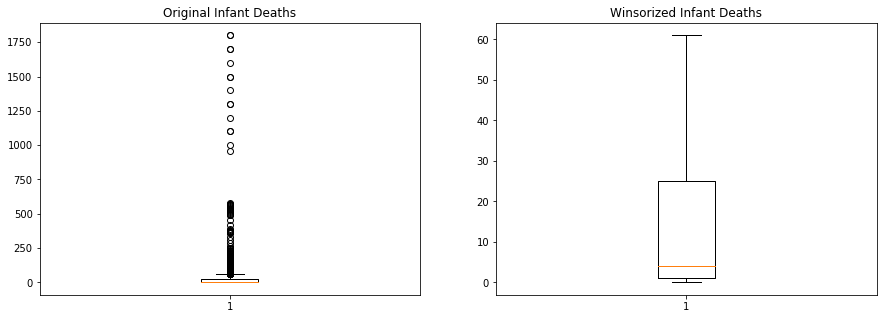

In [115]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Infant_Deaths = Life_data['infant deaths']
plt.boxplot(original_Infant_Deaths)
plt.title("Original Infant Deaths")

plt.subplot(1,2,2)
winsorized_Infant_Deaths = winsorize(Life_data['infant deaths'],(0,0.10))
plt.boxplot(winsorized_Infant_Deaths)
plt.title("Winsorized Infant Deaths")

plt.show()

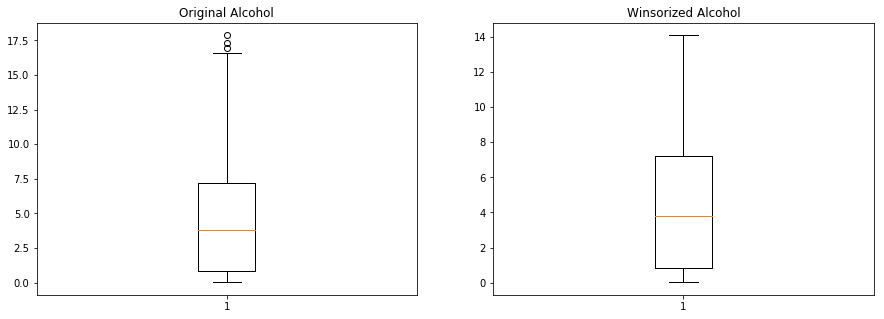

In [116]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Alcohol = Life_data['Alcohol']
plt.boxplot(original_Alcohol)
plt.title("Original Alcohol")

plt.subplot(1,2,2)
winsorized_Alcohol = winsorize(Life_data['Alcohol'],(0,0.01))
plt.boxplot(winsorized_Alcohol)
plt.title("Winsorized Alcohol")

plt.show()

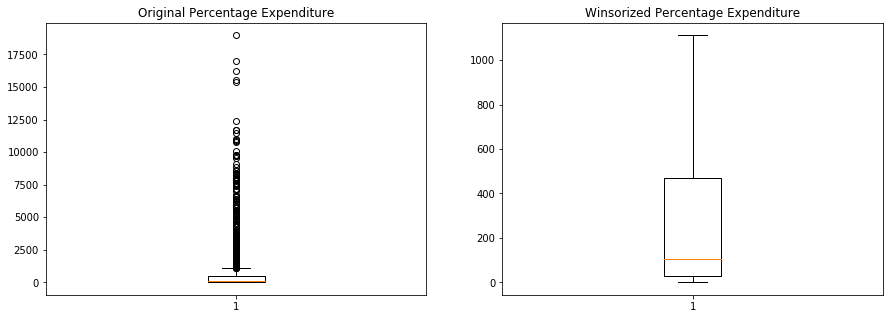

In [117]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Percentage_Exp = Life_data['percentage expenditure']
plt.boxplot(original_Percentage_Exp)
plt.title("Original Percentage Expenditure")

plt.subplot(1,2,2)
winsorized_Percentage_Exp = winsorize(Life_data['percentage expenditure'],(0,0.12))
plt.boxplot(winsorized_Percentage_Exp)
plt.title("Winsorized Percentage Expenditure")

plt.show()

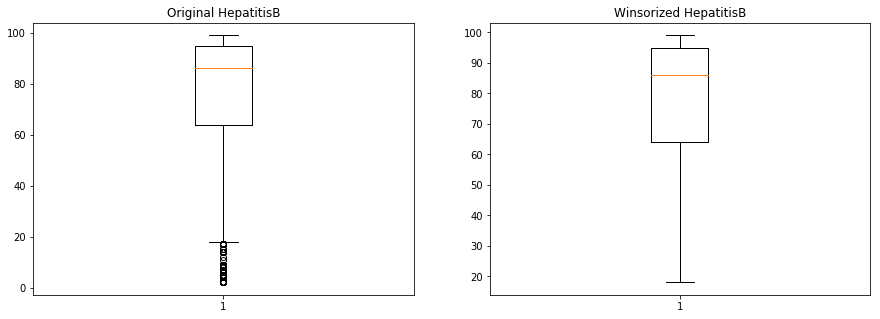

In [118]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_HepatitisB = Life_data['Hepatitis B']
plt.boxplot(original_HepatitisB)
plt.title("Original HepatitisB")

plt.subplot(1,2,2)
winsorized_HepatitisB = winsorize(Life_data['Hepatitis B'],(0.11,0))
plt.boxplot(winsorized_HepatitisB)
plt.title("Winsorized HepatitisB")

plt.show()

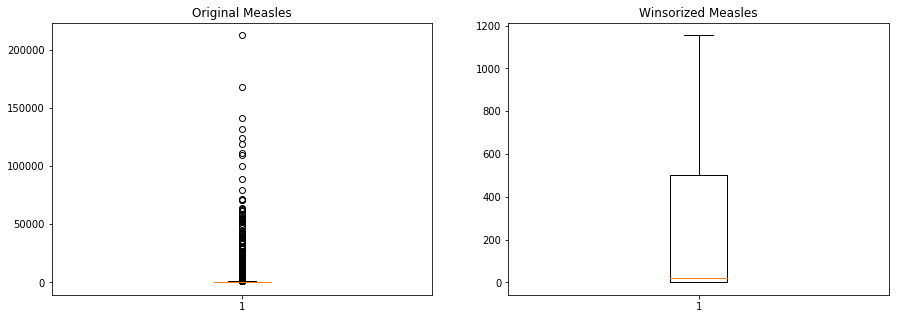

In [119]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Measles = Life_data['Measles ']
plt.boxplot(original_Measles)
plt.title("Original Measles")

plt.subplot(1,2,2)
winsorized_Measles = winsorize(Life_data['Measles '],(0,0.19))
plt.boxplot(winsorized_Measles)
plt.title("Winsorized Measles")

plt.show()

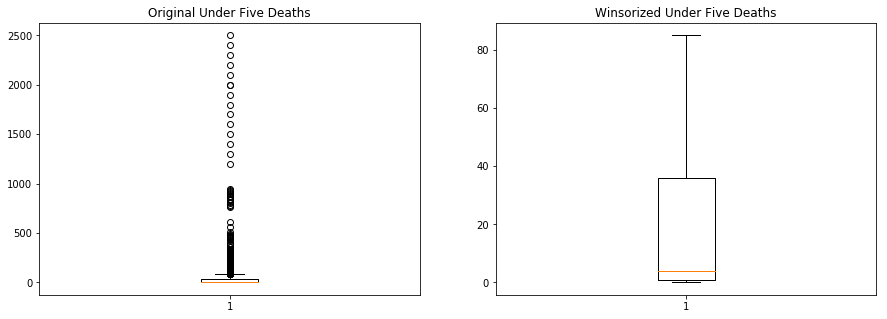

In [120]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Under_Five_Deaths = Life_data['under-five deaths ']
plt.boxplot(original_Under_Five_Deaths)
plt.title("Original Under Five Deaths")

plt.subplot(1,2,2)
winsorized_Under_Five_Deaths = winsorize(Life_data['under-five deaths '],(0,0.12))
plt.boxplot(winsorized_Under_Five_Deaths)
plt.title("Winsorized Under Five Deaths")

plt.show()

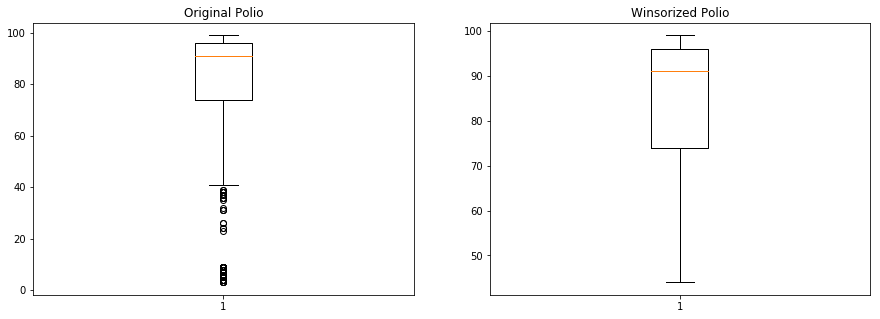

In [121]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Polio = Life_data['Polio']
plt.boxplot(original_Polio)
plt.title("Original Polio")

plt.subplot(1,2,2)
winsorized_Polio = winsorize(Life_data['Polio'],(0.09,0))
plt.boxplot(winsorized_Polio)
plt.title("Winsorized Polio")

plt.show()

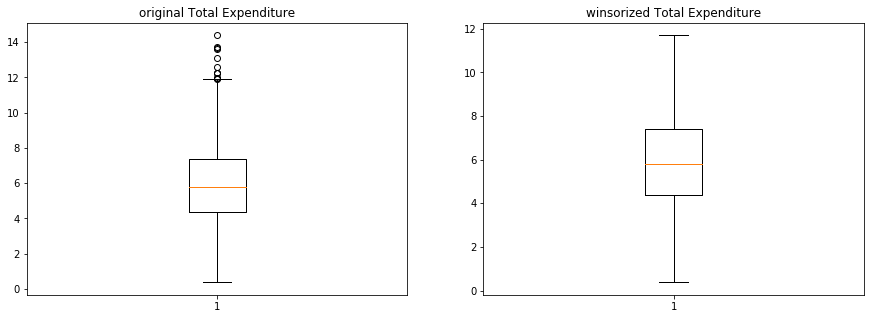

In [122]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Tot_Exp = Life_data['Total expenditure']
plt.boxplot(original_Tot_Exp)
plt.title("original Total Expenditure")

plt.subplot(1,2,2)
winsorized_Tot_Exp = winsorize(Life_data['Total expenditure'],(0,0.01))
plt.boxplot(winsorized_Tot_Exp)
plt.title("winsorized Total Expenditure")

plt.show()

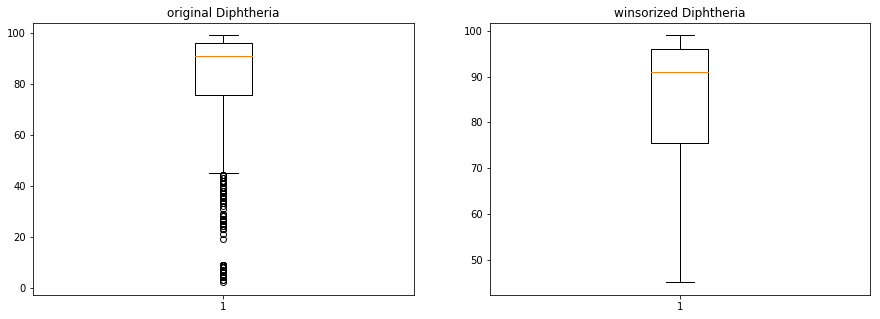

In [123]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Diphtheria = Life_data['Diphtheria ']
plt.boxplot(original_Diphtheria)
plt.title("original Diphtheria")

plt.subplot(1,2,2)
winsorized_Diphtheria = winsorize(Life_data['Diphtheria '],(0.10,0))
plt.boxplot(winsorized_Diphtheria)
plt.title("winsorized Diphtheria")

plt.show()

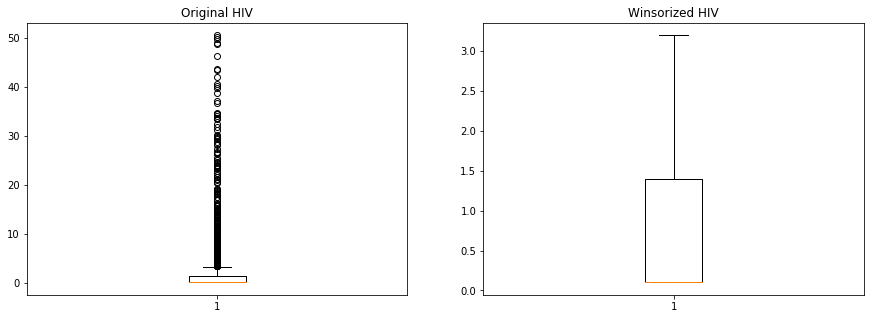

In [124]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_HIV = Life_data[' HIV/AIDS']
plt.boxplot(original_HIV)
plt.title("Original HIV")

plt.subplot(1,2,2)
winsorized_HIV = winsorize(Life_data[' HIV/AIDS'],(0,0.16))
plt.boxplot(winsorized_HIV)
plt.title("Winsorized HIV")

plt.show()

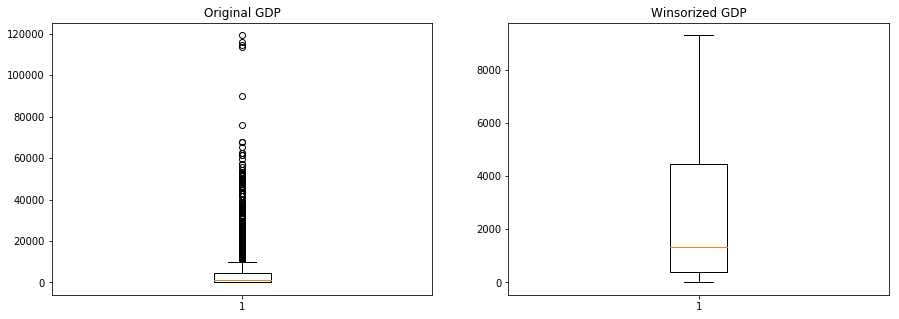

In [125]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_GDP = Life_data['GDP']
plt.boxplot(original_GDP)
plt.title("Original GDP")

plt.subplot(1,2,2)
winsorized_GDP = winsorize(Life_data['GDP'],(0,0.13))
plt.boxplot(winsorized_GDP)
plt.title("Winsorized GDP")

plt.show()

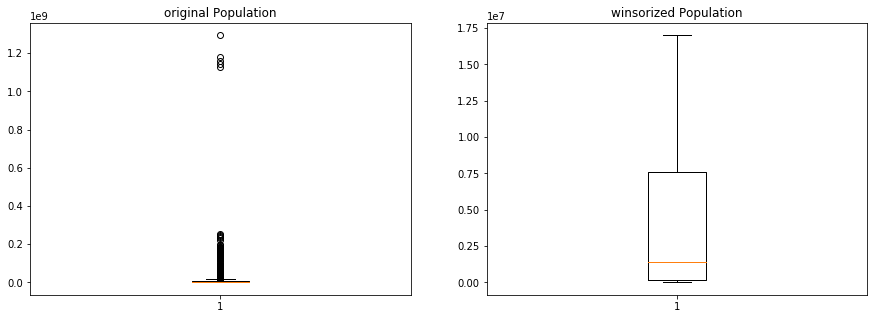

In [126]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Population = Life_data['Population']
plt.boxplot(original_Population)
plt.title("original Population")

plt.subplot(1,2,2)
winsorized_Population = winsorize(Life_data['Population'],(0,0.14))
plt.boxplot(winsorized_Population)
plt.title("winsorized Population")

plt.show()

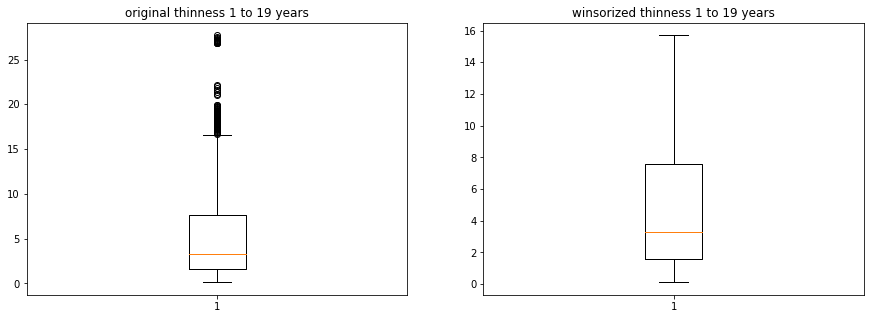

In [127]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_thinness_1to19_years = Life_data[' thinness  1-19 years']
plt.boxplot(original_thinness_1to19_years)
plt.title("original thinness 1 to 19 years")

plt.subplot(1,2,2)
winsorized_thinness_1to19_years = winsorize(Life_data[' thinness  1-19 years'],(0,0.04))
plt.boxplot(winsorized_thinness_1to19_years)
plt.title("winsorized thinness 1 to 19 years")

plt.show()

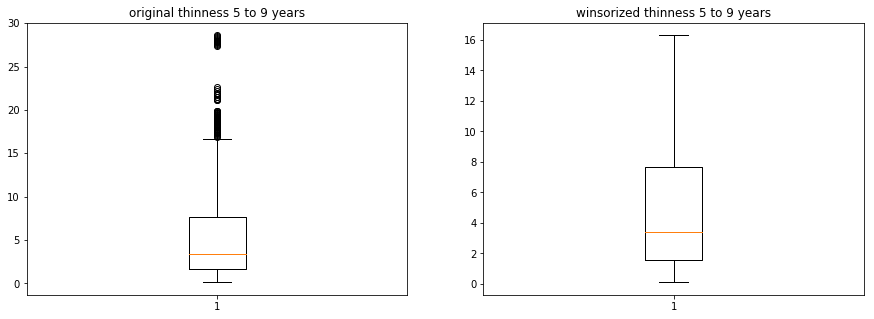

In [128]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_thinness_5to9_years = Life_data[' thinness 5-9 years']
plt.boxplot(original_thinness_5to9_years)
plt.title("original thinness 5 to 9 years")
plt.subplot(1,2,2)
winsorized_thinness_5to9_years = winsorize(Life_data[' thinness 5-9 years'],(0,0.04))
plt.boxplot(winsorized_thinness_5to9_years)
plt.title("winsorized thinness 5 to 9 years")

plt.show()

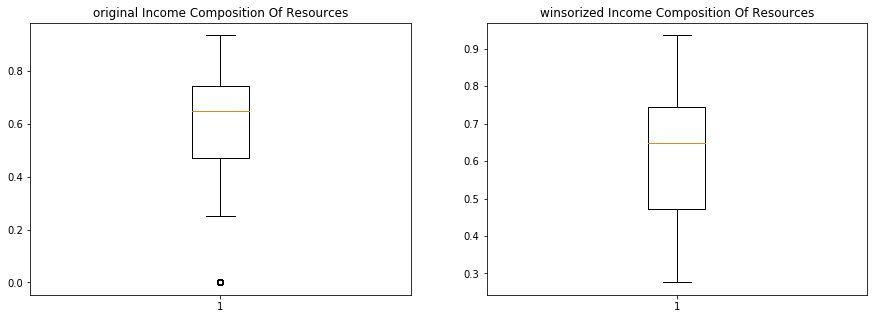

In [129]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Income_Comp_Of_Resources = Life_data['Income composition of resources']
plt.boxplot(original_Income_Comp_Of_Resources)
plt.title("original Income Composition Of Resources")

plt.subplot(1,2,2)
winsorized_Income_Comp_Of_Resources = winsorize(Life_data['Income composition of resources'],(0.05,0))
plt.boxplot(winsorized_Income_Comp_Of_Resources)
plt.title("winsorized Income Composition Of Resources")

plt.show()

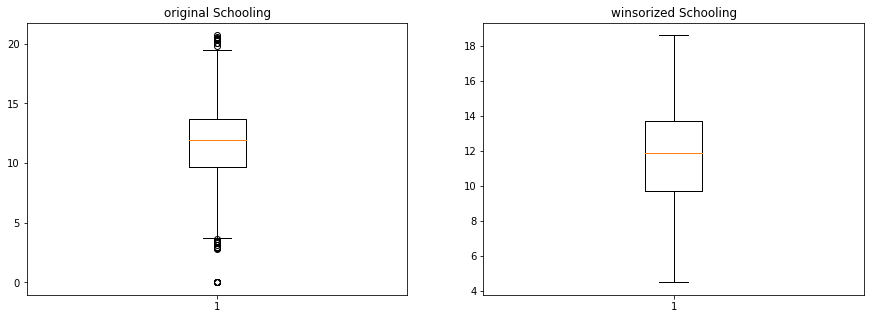

In [130]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
original_Schooling = Life_data['Schooling']
plt.boxplot(original_Schooling)
plt.title("original Schooling")

plt.subplot(1,2,2)
winsorized_Schooling = winsorize(Life_data['Schooling'],(0.02,0.01))
plt.boxplot(winsorized_Schooling)
plt.title("winsorized Schooling")

plt.show()

In [131]:
winsorized_list = [winsorized_Life_Expectancy,winsorized_Adult_Mortality,winsorized_Alcohol,winsorized_Measles,winsorized_Infant_Deaths,
                   winsorized_Percentage_Exp,winsorized_HepatitisB,winsorized_Under_Five_Deaths,winsorized_Polio,winsorized_Tot_Exp,
                   winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,
                   winsorized_thinness_5to9_years, winsorized_Income_Comp_Of_Resources,winsorized_Schooling]

for variable in winsorized_list:
    q75, q25 = np.percentile(variable, [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    
    print("Number of outliers after winsorization   : {} ".format(len(np.where((variable > max_val) | (variable < min_val))[0])))

Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 
Number of outliers after winsorization   : 0 


In [132]:
# Adding winsorized variables to our dataframe
Life_data['winsorized_Life_Expectancy'] = winsorized_Life_Expectancy
Life_data['winsorized_Adult_Mortality'] = winsorized_Adult_Mortality
Life_data['winsorized_Infant_Deaths'] = winsorized_Infant_Deaths
Life_data['winsorized_Alcohol'] = winsorized_Alcohol
Life_data['winsorized_Percentage_Exp'] = winsorized_Percentage_Exp
Life_data['winsorized_HepatitisB'] = winsorized_HepatitisB
Life_data['winsorized_Under_Five_Deaths'] = winsorized_Under_Five_Deaths
Life_data['winsorized_Polio'] = winsorized_Polio
Life_data['winsorized_Tot_Exp'] = winsorized_Tot_Exp
Life_data['winsorized_Diphtheria'] = winsorized_Diphtheria
Life_data['winsorized_HIV'] = winsorized_HIV
Life_data['winsorized_GDP'] = winsorized_GDP
Life_data['winsorized_Population'] = winsorized_Population
Life_data['winsorized_thinness_1to19_years'] = winsorized_thinness_1to19_years
Life_data['winsorized_thinness_5to9_years'] = winsorized_thinness_5to9_years
Life_data['winsorized_Income_Comp_Of_Resources'] = winsorized_Income_Comp_Of_Resources
Life_data['winsorized_Schooling'] = winsorized_Schooling
Life_data['winsorized_Measles'] = winsorized_Measles

# Exploratory Data analysis

In [133]:
Life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,8.16,65.0,0.1,584.259210,16993354.0,15.7,16.3,0.479,10.1,1154
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,8.18,62.0,0.1,612.696514,327582.0,15.7,16.3,0.476,10.0,492
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,8.13,64.0,0.1,631.744976,16993354.0,15.7,16.3,0.470,9.9,430
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,8.52,67.0,0.1,669.959000,3696958.0,15.7,16.3,0.463,9.8,1154
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,7.87,68.0,0.1,63.537231,2978599.0,15.7,16.3,0.454,9.5,1154


In [134]:
Life_data.size

79480

In [135]:
Life_data.shape

(1987, 40)

In [136]:
Life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,winsorized_Tot_Exp,winsorized_Diphtheria,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles
count,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000,1987.00000,1987.000000,1987.000000,1987.000000,...,1987.000000,1987.000000,1987.000000,1987.000000,1.987000e+03,1987.000000,1987.000000,1987.000000,1987.000000,1987.000000
mean,2006.984902,67.981782,175.187217,36.623553,4.455644,685.492318,73.86160,2729.561651,36.428636,50.932562,...,5.895471,83.225969,0.874082,2864.719760,4.799769e+06,4.955561,5.024006,0.616143,11.658581,304.742828
std,4.323147,9.706401,131.616942,138.784913,3.976733,1761.669050,29.02807,12102.389143,19.736138,188.933117,...,2.266421,17.239348,1.183198,3186.069874,6.217060e+06,4.187776,4.265385,0.174584,3.102260,456.738004
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,2.00000,0.000000,1.400000,0.000000,...,0.370000,45.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.276000,4.500000,0.000000
25%,2003.000000,61.700000,75.000000,1.000000,0.830000,29.469887,64.00000,0.000000,18.150000,1.000000,...,4.360000,75.500000,0.100000,384.553107,1.967480e+05,1.600000,1.600000,0.473000,9.700000,0.000000
50%,2007.000000,69.900000,153.000000,4.000000,3.770000,104.314473,86.00000,20.000000,38.700000,4.000000,...,5.800000,91.000000,0.100000,1334.651896,1.396861e+06,3.300000,3.400000,0.648000,11.900000,20.000000
75%,2011.000000,74.700000,243.000000,25.000000,7.190000,470.870122,95.00000,499.500000,55.000000,36.000000,...,7.385000,96.000000,1.400000,4441.530655,7.625918e+06,7.600000,7.700000,0.745000,13.700000,499.500000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,18961.348600,99.00000,212183.000000,77.100000,2500.000000,...,11.700000,99.000000,3.200000,9291.227619,1.699335e+07,15.700000,16.300000,0.936000,18.600000,1154.000000


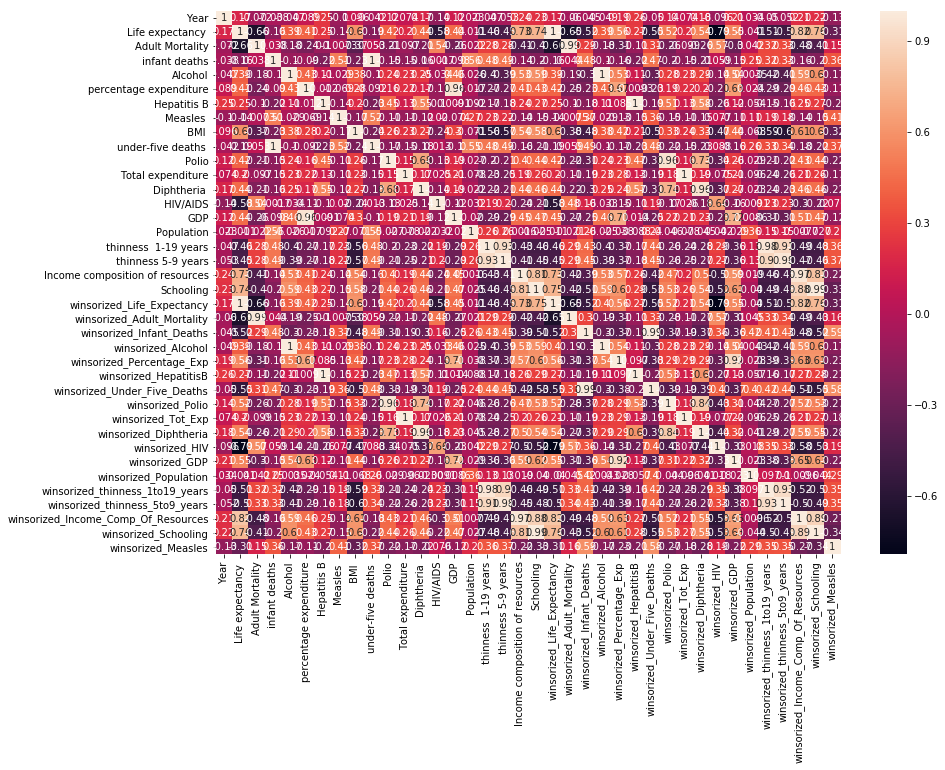

In [137]:
plt.figure(figsize = (14, 10))
sns.heatmap(Life_data.corr(), annot = True)

In [138]:
round(Life_data[['Status','Life expectancy ']].groupby(['Status']).mean(),2)

,Life expectancy
Status,
Developed,78.83
Developing,66.16


In [139]:
stats.ttest_ind(Life_data.loc[Life_data['Status']=='Developed','Life expectancy '],Life_data.loc[Life_data['Status']=='Developing','Life expectancy '])

Ttest_indResult(statistic=22.92439377113489, pvalue=2.2504696584331004e-103)

In [140]:
feature_df = Life_data[['Status','winsorized_Life_Expectancy','winsorized_Income_Comp_Of_Resources','winsorized_HIV','winsorized_Adult_Mortality']]
feature_df = pd.concat([feature_df,pd.get_dummies(feature_df['Status'],drop_first=True)],axis=1)
final = feature_df.drop('Status',axis=1)
final.sample(10)

,winsorized_Life_Expectancy,winsorized_Income_Comp_Of_Resources,winsorized_HIV,winsorized_Adult_Mortality,Developing
1962,77.2,0.765,0.1,12.0,1
2726,51.0,0.418,3.2,53.0,1
540,48.4,0.284,3.2,43.0,1
986,74.4,0.722,0.1,12.0,1
1024,57.4,0.485,3.2,39.0,1
1971,75.5,0.728,0.1,126.0,1
2558,67.3,0.603,0.2,171.0,1
900,69.6,0.719,0.1,192.0,1
989,72.3,0.694,0.1,134.0,1
1875,73.0,0.570,0.4,193.0,1


In [142]:
Life_data = pd.concat([Life_data,pd.get_dummies(Life_data['Status'],drop_first=True)],axis=1)
Life_data = Life_data.drop('Status',axis=1)
Life_data.sample(10)

,Country,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,...,winsorized_HIV,winsorized_GDP,winsorized_Population,winsorized_thinness_1to19_years,winsorized_thinness_5to9_years,winsorized_Income_Comp_Of_Resources,winsorized_Schooling,winsorized_Measles,Developing,Developing
2501,Swaziland,2003,45.9,6.0,3,5.65,2.819124,9.0,350,27.1,...,3.2,22.994490,187392.0,8.2,8.4,0.493,9.1,350,1,1
2634,Tonga,2014,73.3,135.0,0,0.01,565.967217,8.0,0,74.8,...,0.1,4192.349758,15782.0,0.1,0.1,0.716,14.3,0,1,1
507,Canada,2004,80.0,77.0,2,7.80,5513.329924,14.0,7,6.6,...,0.1,9291.227619,31995.0,0.5,0.4,0.881,15.8,7,1,1
2716,Uganda,2013,67.0,325.0,71,0.01,90.761444,78.0,7878,17.6,...,3.2,662.492293,16993354.0,5.7,5.7,0.478,10.0,1154,1,1
1101,Guinea-Bissau,2004,53.5,38.0,5,2.58,13.529996,8.0,3526,19.6,...,3.2,393.313824,135345.0,9.4,9.3,0.276,7.7,1154,1,1
1354,Kazakhstan,2007,65.3,288.0,8,7.44,499.730412,94.0,13,47.3,...,0.1,6771.414797,15484192.0,2.4,2.5,0.754,14.7,13,1,1
2221,Sao Tome and Principe,2011,66.6,198.0,0,5.69,7.495401,96.0,0,27.7,...,0.5,134.326189,1788.0,6.0,5.9,0.546,10.6,0,1,1
607,Comoros,2000,59.5,272.0,1,0.09,35.029486,28.0,0,17.3,...,0.1,375.852857,542357.0,7.9,7.9,0.276,8.2,0,1,1
2813,Uruguay,2012,76.5,118.0,0,5.77,339.719049,95.0,0,62.3,...,0.1,1592.681900,3396777.0,1.5,1.5,0.784,15.5,0,1,1
2830,Uzbekistan,2011,68.5,183.0,19,2.83,140.690528,99.0,476,41.4,...,0.1,1564.966945,293394.0,3.0,3.1,0.664,12.0,476,1,1


In [143]:
Life_data.columns

Index(['Country', 'Year', 'Life expectancy ', 'Adult Mortality',
       'infant deaths', 'Alcohol', 'percentage expenditure', 'Hepatitis B',
       'Measles ', ' BMI ', 'under-five deaths ', 'Polio', 'Total expenditure',
       'Diphtheria ', ' HIV/AIDS', 'GDP', 'Population',
       ' thinness  1-19 years', ' thinness 5-9 years',
       'Income composition of resources', 'Schooling',
       'winsorized_Life_Expectancy', 'winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles', 'Developing', 'Developing'],
      dtype='object')

In [144]:
x= Life_data[['winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
       'winsorized_Measles', 'Developing']]

y = Life_data['winsorized_Life_Expectancy']

In [146]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)

In [147]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(1390, 19)
(1390,)
(597, 19)
(597,)


In [148]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [150]:
model = LinearRegression(fit_intercept=True, normalize=True).fit(x_train, y_train)
predictions= model.predict(x_test)
len(predictions)

597

In [151]:
predictions.shape

(597,)

In [153]:
r2_score(predictions, y_test)

0.855374859060773

In [155]:
mean_squared_error(predictions, y_test)

12.114049605261584

In [156]:
mean_absolute_error(predictions, y_test)

2.551652702751502

In [157]:
x = Life_data[['winsorized_Adult_Mortality',
       'winsorized_Infant_Deaths', 'winsorized_Alcohol',
       'winsorized_Percentage_Exp', 'winsorized_HepatitisB',
       'winsorized_Under_Five_Deaths', 'winsorized_Polio',
       'winsorized_Tot_Exp', 'winsorized_Diphtheria', 'winsorized_HIV',
       'winsorized_GDP', 'winsorized_Population',
       'winsorized_thinness_1to19_years', 'winsorized_thinness_5to9_years',
       'winsorized_Income_Comp_Of_Resources', 'winsorized_Schooling',
        'Developing']]
y = Life_data['winsorized_Life_Expectancy']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state= 42)
model = LinearRegression(fit_intercept=True, normalize=True).fit(x_train, y_train)
predictions= model.predict(x_test)
len(predictions)

597

In [158]:
r2_score(predictions, y_test)

0.8580367522667597

In [159]:
mean_squared_error(predictions, y_test)

11.884812244117047

In [160]:
mean_absolute_error(predictions, y_test)

2.511798428108266

In [161]:
!pip install watson-machine-learning-client

In [162]:
from watson_machine_learning_client import WatsonMachineLearningAPIClient

2020-06-17 14:10:26,627 - watson_machine_learning_client.metanames - WARNING - 'AUTHOR_EMAIL' meta prop is deprecated. It will be ignored.


In [163]:
wml_credentials= {
  "apikey": "1Dx88-WsetZerbpn1DE_RFBCX2I9WQSpnfpaKhQ2nEMu",
  "iam_apikey_description": "Auto-generated for key f248171e-7726-4bfa-933d-74266af1a35e",
  "iam_apikey_name": "Service credentials-1",
  "iam_role_crn": "crn:v1:bluemix:public:iam::::serviceRole:Writer",
  "iam_serviceid_crn": "crn:v1:bluemix:public:iam-identity::a/012e295336474ae59d36d7f68f0ea1ca::serviceid:ServiceId-4b256378-918c-4c3d-80e5-7d6858e6b59b",
  "instance_id": "e8ffe42f-72e7-42a9-899d-4172b9aad84a",
  "url": "https://eu-gb.ml.cloud.ibm.com"
}

In [164]:
client = WatsonMachineLearningAPIClient( wml_credentials )

In [171]:
metadata={
    client.repository.ModelMetaNames.AUTHOR_NAME: "Pooja",
    client.repository.ModelMetaNames.AUTHOR_EMAIL: "poojakorekar83@gmail.com",
    client.repository.ModelMetaNames.NAME: "Predicting_Life_Expectancy"
}

In [166]:
stored_data=client.repository.store_model(model , meta_props = metadata)

In [167]:
stored_data

{'metadata': {'guid': '8d7cd50c-1167-4457-8f80-9022cc98c77f',
  'url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e8ffe42f-72e7-42a9-899d-4172b9aad84a/published_models/8d7cd50c-1167-4457-8f80-9022cc98c77f',
  'created_at': '2020-06-17T14:10:27.520Z',
  'modified_at': '2020-06-17T14:10:27.583Z'},
 'entity': {'runtime_environment': 'python-3.6',
  'learning_configuration_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e8ffe42f-72e7-42a9-899d-4172b9aad84a/published_models/8d7cd50c-1167-4457-8f80-9022cc98c77f/learning_configuration',
  'author': {'name': 'Pooja'},
  'name': 'Predicting_Life_Expectancy ',
  'learning_iterations_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e8ffe42f-72e7-42a9-899d-4172b9aad84a/published_models/8d7cd50c-1167-4457-8f80-9022cc98c77f/learning_iterations',
  'feedback_url': 'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e8ffe42f-72e7-42a9-899d-4172b9aad84a/published_models/8d7cd50c-1167-4457-8f80-9022cc98c77f/feedback',
  'latest_version':

In [168]:
published_model_uid = client.repository.get_model_uid(stored_data)

In [169]:
published_model_uid

'8d7cd50c-1167-4457-8f80-9022cc98c77f'

In [172]:
deployment = client.deployments.create(published_model_uid, name="Predicting_Life_Expectancy")



#######################################################################################

Synchronous deployment creation for uid: '8d7cd50c-1167-4457-8f80-9022cc98c77f' started

#######################################################################################


INITIALIZING
DEPLOY_SUCCESS


------------------------------------------------------------------------------------------------
Successfully finished deployment creation, deployment_uid='e5273500-198a-4f26-8cdc-b9931a864bf3'
------------------------------------------------------------------------------------------------




In [173]:
scoring_url = client.deployments.get_scoring_url(deployment)

In [174]:
scoring_url

'https://eu-gb.ml.cloud.ibm.com/v3/wml_instances/e8ffe42f-72e7-42a9-899d-4172b9aad84a/deployments/e5273500-198a-4f26-8cdc-b9931a864bf3/online'